In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

## Import the dataset

In [2]:
df=pd.read_csv("C:/Users/ARGHADEEP FADIKAR/OneDrive/Desktop/py4e/Credit card project/creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## Observing NA values in the dataset

In [7]:
pd.DataFrame(df.isna().sum(),columns=["Number of NA values"])

,Number of NA values
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


There is no missing values in the dataset.

## Column "Time"

In [8]:
u=df.groupby("Class")
df_c1=df[df["Class"]==1]
df_c0=df[df["Class"]==0]
pd.DataFrame(u["Time"].mean())

,Time
Class,
0,94838.202258
1,80746.806911


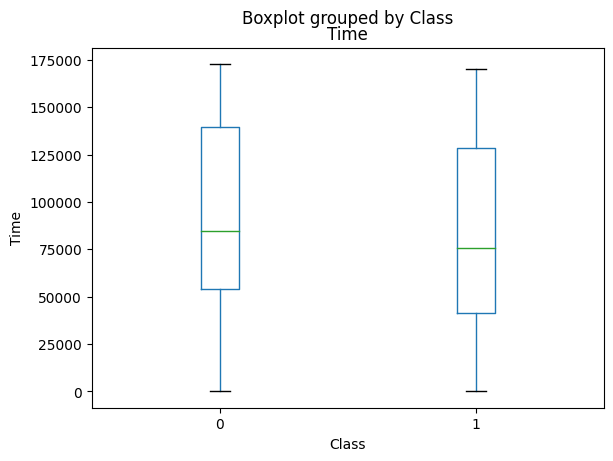

In [9]:
df.boxplot(column="Time",by="Class")
plt.ylabel("Time")
plt.grid(False)
plt.show()

There is no outlier in the column "Time"

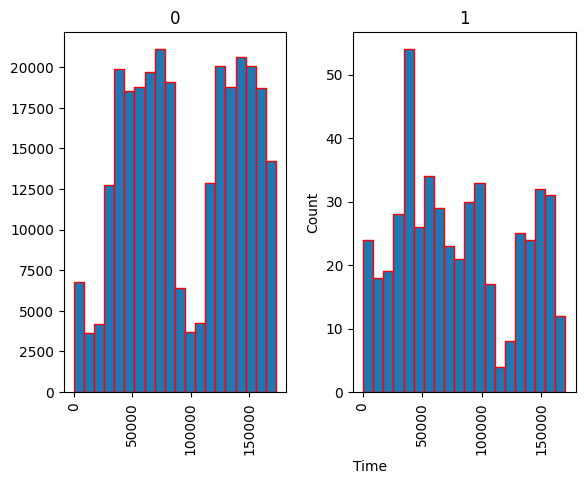

In [10]:
df.hist("Time",by="Class",bins=20,edgecolor="red")

plt.xlabel("Time",loc="left")
plt.ylabel("Count")

plt.show()

## Column "V1"

In [11]:
pd.DataFrame(u["V1"].mean())

,V1
Class,
0,0.008258
1,-4.771948


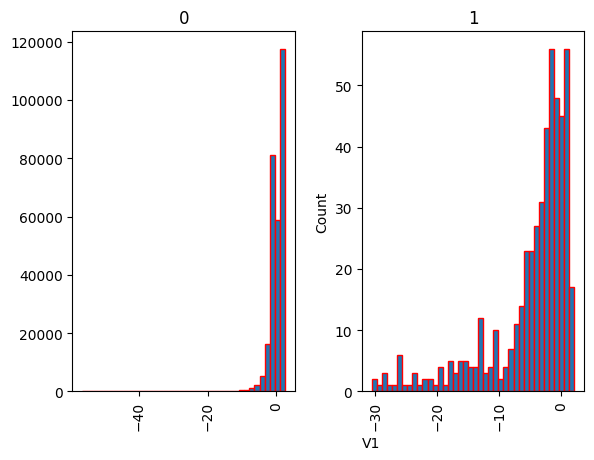

In [12]:
df.hist("V1",by="Class",bins=40,edgecolor="red")

plt.xlabel("V1",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V1 takes the value around 0 with a little variance,but for class1 V1 takes many negative value with greater variance.

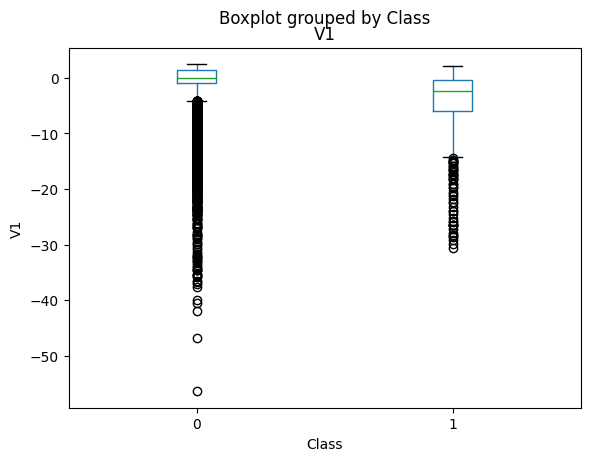

In [13]:
df.boxplot(column="V1",by="Class")
plt.ylabel("V1")
plt.grid(False)
plt.show()

Form the boxplot we can see that there are lots of outliers for both the classes

## Column "V2"

In [14]:
pd.DataFrame(u["V2"].mean())

,V2
Class,
0,-0.006271
1,3.623778


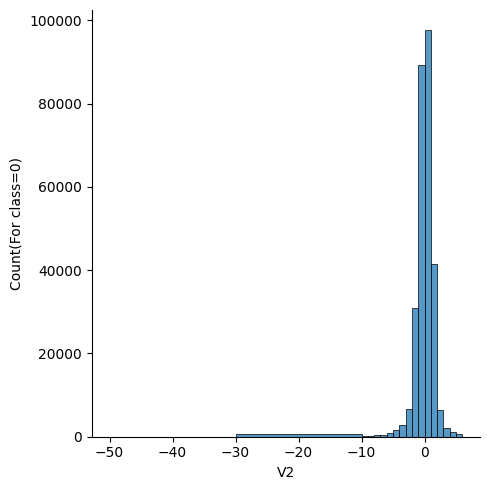

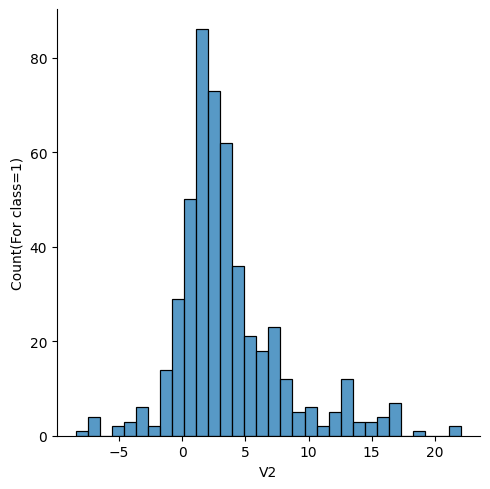

In [15]:
sns.displot(df_c0["V2"],bins=[-50,-30,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6])
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V2"])
plt.ylabel("Count(For class=1)")
plt.show()

From the above table and histogram it can be concluded that for class0 V2 takes the value around 0 with a little variance,but for class1 V1 takes many positive values with greater variance.

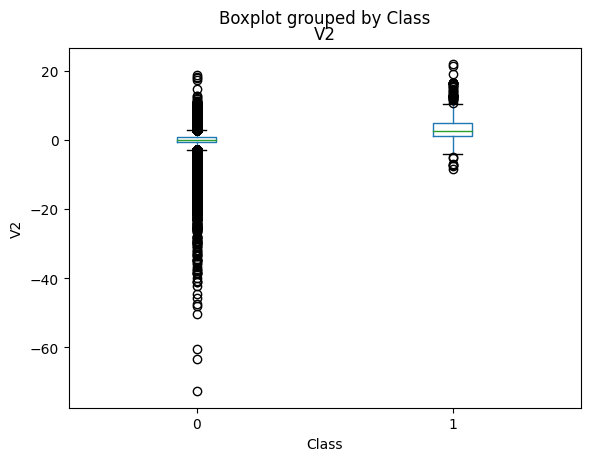

In [16]:
df.boxplot(column="V2",by="Class")
plt.ylabel("V2")
plt.grid(False)
plt.show()

Form the boxplot we can see that there are lots of outliers for both the classes

In [17]:
df_0=df[df["Class"]==0]
df_1=df[df["Class"]==1]
t1=df_0["V2"]>0
t2=df_1["V2"]>0
print("Fraction of Class0 individuals whose V2 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V2 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V2 values are positive :  0.5281149429330144
Fraction of Class1 individuals whose V2 values are positive :  0.8902439024390244


Note that most of the class 1 values(V2) are positive where class0 values are equally distributed.

## Column "V3"

In [18]:
pd.DataFrame(u["V3"].mean())

,V3
Class,
0,0.012171
1,-7.033281


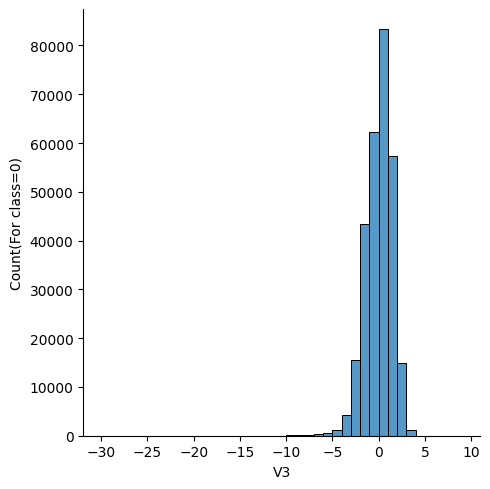

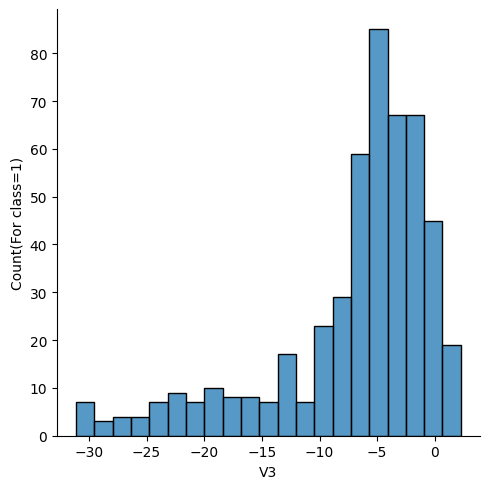

In [19]:
sns.displot(df_c0["V3"],bins=range(-30,10))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V3"])
plt.ylabel("Count(For class=1)")
plt.show()

From the above table and histogram it can be concluded that for class0 V2 takes the value around 0 with a little variance,but for class1 V1 takes many negative values with greater variance.

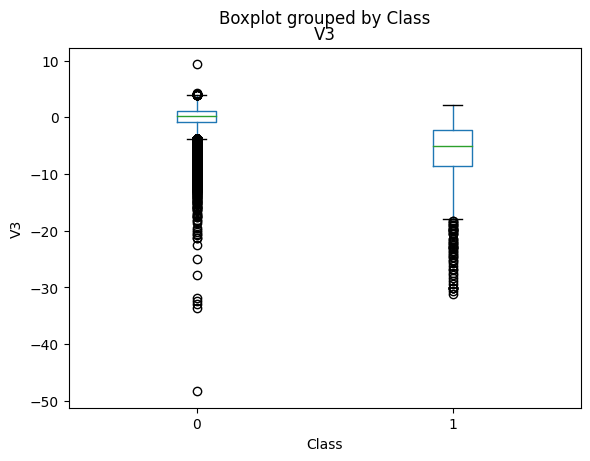

In [20]:
df.boxplot(column="V3",by="Class")
plt.ylabel("V3")
plt.grid(False)
plt.show()

    From the the above boxplot we can see that there are lots of negative outliers for both type of class.

In [21]:
t1=df_0["V3"]<0
t2=df_1["V3"]<0
print("Fraction of Class0 individuals whose V2 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V2 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V2 values are negative :  0.4491602623850307
Fraction of Class1 individuals whose V2 values are negative :  0.9349593495934959


Note that 93% Class1 values(V3) are negative whereas Class0 values are more or less equally distributed.

## Column "V4"

In [22]:
pd.DataFrame(u["V4"].mean())

,V4
Class,
0,-0.007860
1,4.542029


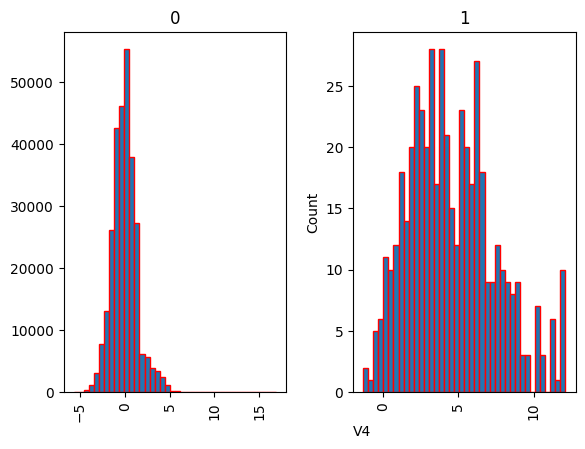

In [23]:
df.hist("V4",by="Class",bins=40,edgecolor="red")

plt.xlabel("V4",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V2 takes the value around 0 ,but for class1 V1 takes many positive values.

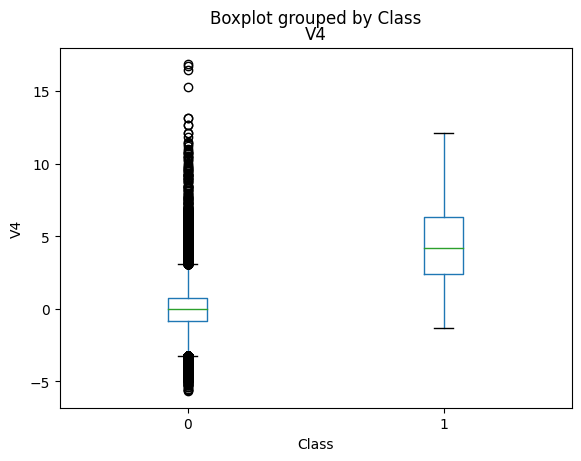

In [24]:
df.boxplot(column="V4",by="Class")
plt.ylabel("V4")
plt.grid(False)
plt.show()

Here for class 0 there are many outliers but for class 1 there are no outliers.

In [25]:
t1=df_0["V4"]>0
t2=df_1["V4"]>0
print("Fraction of Class0 individuals whose V4 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V4 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V4 values are positive :  0.4931994442783532
Fraction of Class1 individuals whose V4 values are positive :  0.9715447154471545


Note that 97% Class1 values(V3) are positive whereas Class 0 values are more or less equally distributed.

## Column "V5"

In [26]:
pd.DataFrame(u["V5"].mean())

,V5
Class,
0,0.005453
1,-3.151225


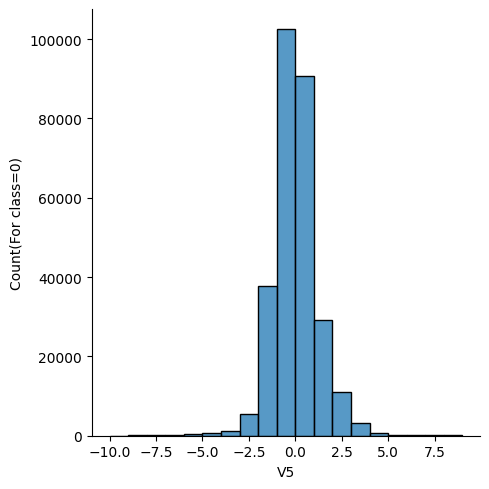

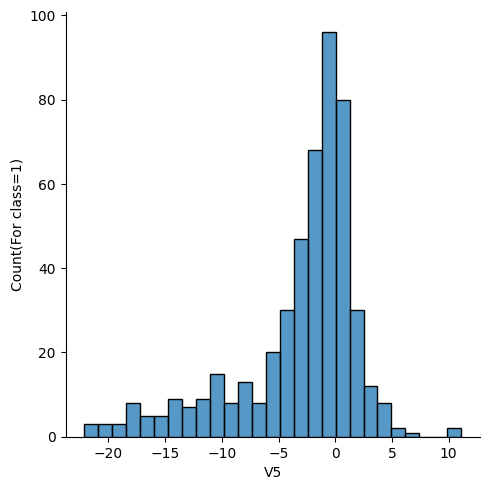

In [27]:
sns.displot(df_c0["V5"],bins=range(-10,10))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V5"])
plt.ylabel("Count(For class=1)")
plt.show()

From the above table and histogram it can be concluded that for class0 V2 takes the value around 0 ,but for class1 V1 takes many negative values.

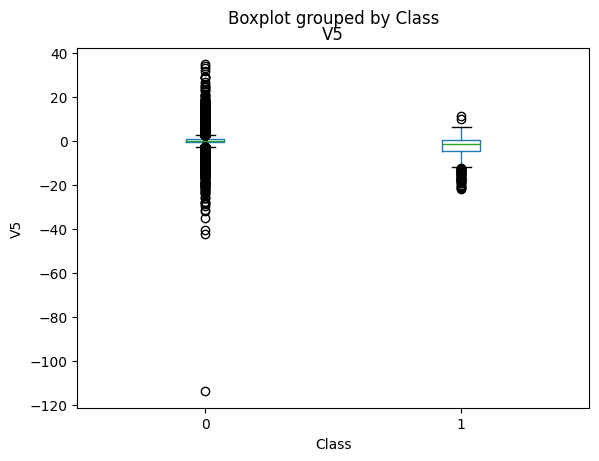

In [28]:
df.boxplot(column="V5",by="Class")
plt.ylabel("V5")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of class.

In [29]:
t1=df_0["V5"]<0
t2=df_1["V5"]<0
print("Fraction of Class0 individuals whose V5 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V5 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V5 values are negative :  0.5225612436909766
Fraction of Class1 individuals whose V5 values are negative :  0.7235772357723578


Note that most of the class 1 values(V5) are negative where class0 values are equally distributed.

## Column "V6"

In [30]:
pd.DataFrame(u["V6"].mean())

,V6
Class,
0,0.002419
1,-1.397737


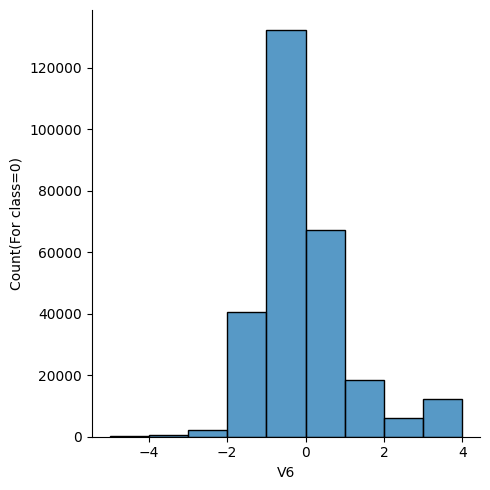

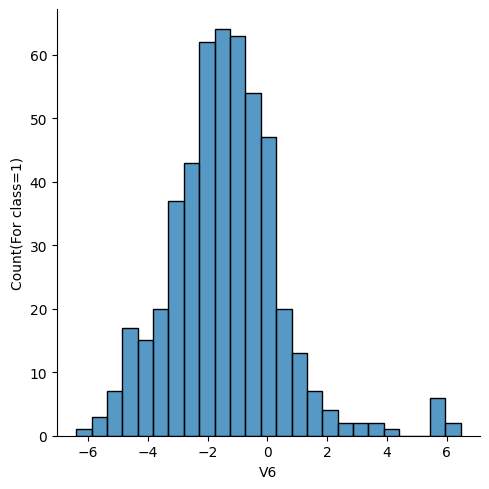

In [31]:
sns.displot(df_c0["V6"],bins=range(-5,5))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V6"])
plt.ylabel("Count(For class=1)")
plt.show()

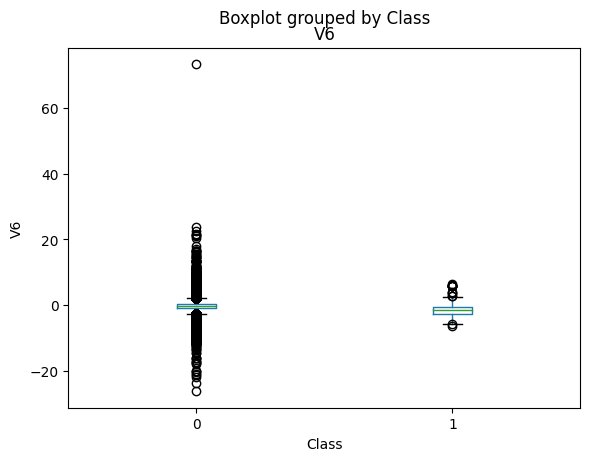

In [32]:
df.boxplot(column="V6",by="Class")
plt.ylabel("V6")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of class.

In [33]:
t1=df_0["V6"]<0
t2=df_1["V6"]<0
print("Fraction of Class0 individuals whose V6 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V6 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V6 values are negative :  0.6198019801980198
Fraction of Class1 individuals whose V6 values are negative :  0.8414634146341463


For class 1 most of the values(V6) are negative.

## Column "V7"

In [34]:
pd.DataFrame(u["V7"].mean())

,V7
Class,
0,0.009637
1,-5.568731


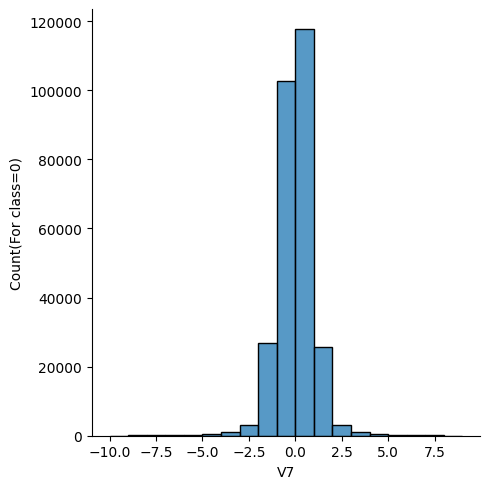

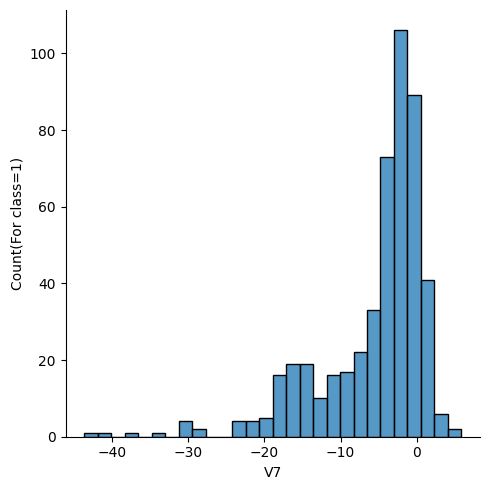

In [35]:
sns.displot(df_c0["V7"],bins=range(-10,10))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V7"])
plt.ylabel("Count(For class=1)")
plt.show()

From the above table and histogram it can be concluded that for class0 V7 takes the value around 0 ,but for class1 V1 takes many negative values.

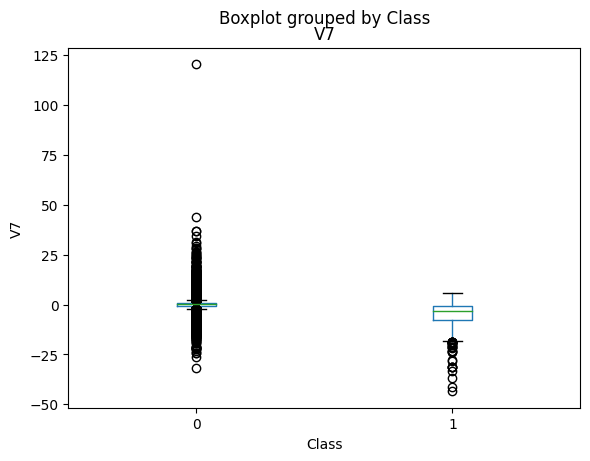

In [36]:
df.boxplot(column="V7",by="Class")
plt.ylabel("V7")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of class.For class 1 outliers are negative.

In [37]:
t1=df_0["V7"]<0
t2=df_1["V7"]<0
print("Fraction of Class0 individuals whose V7 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V7 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V7 values are negative :  0.4763765541740675
Fraction of Class1 individuals whose V7 values are negative :  0.8353658536585366


Note that most of the class 1 values(V7) are negative where class0 values are equally distributed.

## Column"V8"

In [38]:
pd.DataFrame(u["V8"].mean())

,V8
Class,
0,-0.000987
1,0.570636


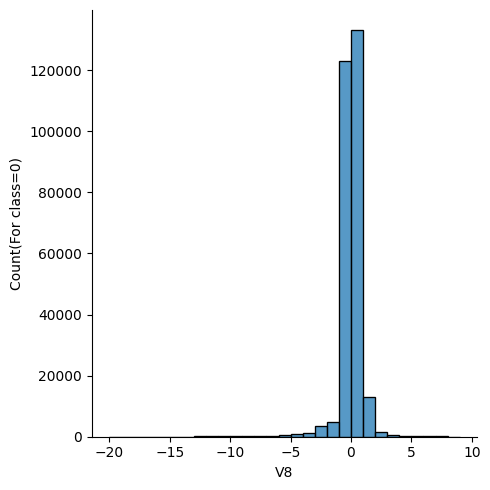

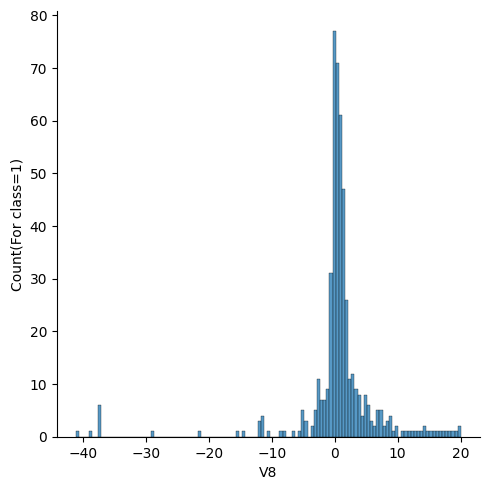

In [39]:
sns.displot(df_c0["V8"],bins=range(-20,10))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V8"])
plt.ylabel("Count(For class=1)")
plt.show()

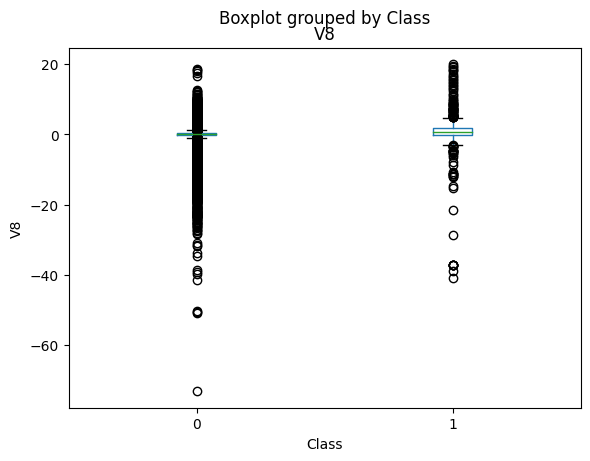

In [40]:
df.boxplot(column="V8",by="Class")
plt.ylabel("V8")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of classes.

In [41]:
t1=df_0["V8"]<0
t2=df_1["V8"]<0
print("Fraction of Class0 individuals whose V8 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V8 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V8 values are negative :  0.47613386560680937
Fraction of Class1 individuals whose V8 values are negative :  0.30284552845528456


Note that most of the class 1 values(V8) are positive where class0 values are almost equally distributed

## Column "V9"

In [42]:
pd.DataFrame(u["V9"].mean())

,V9
Class,
0,0.004467
1,-2.581123


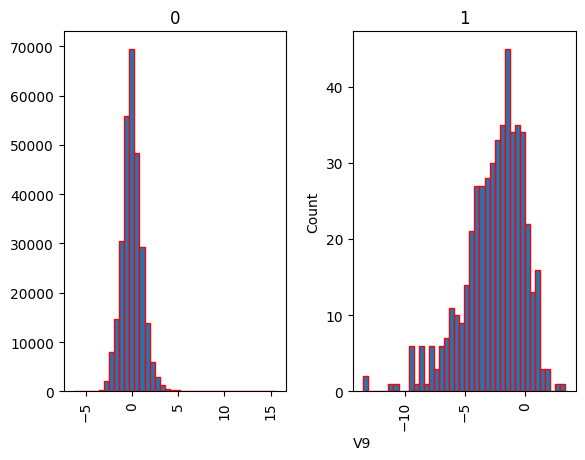

In [43]:
df.hist("V9",by="Class",bins=40,edgecolor="red")

plt.xlabel("V9",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V7 takes the value around 0 ,but for class1 V1 takes many negative values.

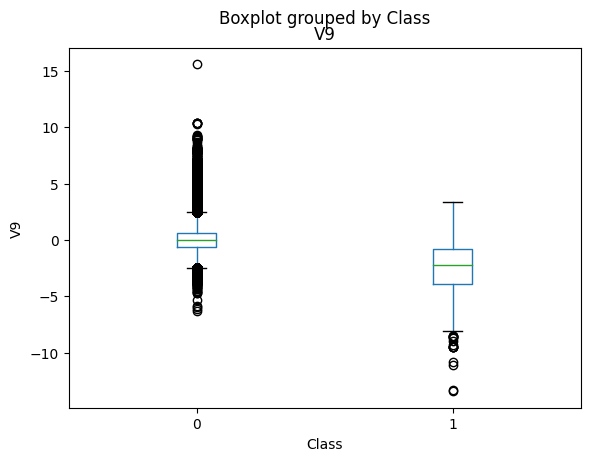

In [44]:
df.boxplot(column="V9",by="Class")
plt.ylabel("V9")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of classes.Most of the outliers in class 1 are negative

In [45]:
t1=df_0["V9"]<0
t2=df_1["V9"]<0
print("Fraction of Class0 individuals whose V9 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V9 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V9 values are negative :  0.5241404779909608
Fraction of Class1 individuals whose V9 values are negative :  0.8821138211382114


Note that most of the class 1 values(V8) are negative where class0 values are almost equally distributed.

## Column "V10"

In [46]:
pd.DataFrame(u["V10"].mean())

,V10
Class,
0,0.009824
1,-5.676883


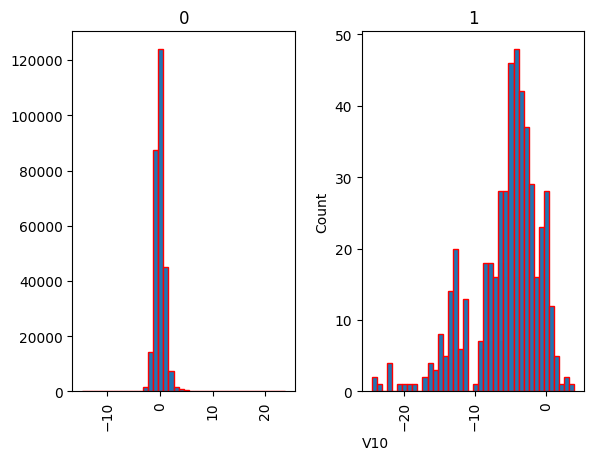

In [47]:
df.hist("V10",by="Class",bins=40,edgecolor="red")

plt.xlabel("V10",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V10 takes the value around 0 ,but for class1 V1 takes many negative values.

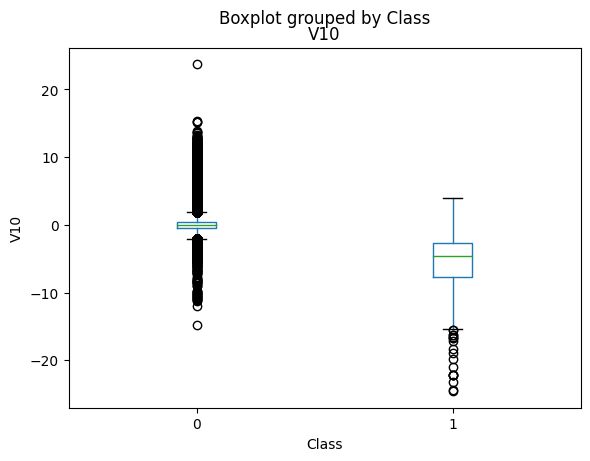

In [48]:
df.boxplot(column="V10",by="Class")
plt.ylabel("V10")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of classes.Most of the outliers in class 1 are negative

In [49]:
t1=df_0["V10"]<0
t2=df_1["V10"]<0
print("Fraction of Class0 individuals whose V9 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V9 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V9 values are negative :  0.5608814167384767
Fraction of Class1 individuals whose V9 values are negative :  0.9247967479674797


Note that most of the class 1 values(V8) are negative where class0 values are almost equally distributed.

## Column "V11"

In [50]:
pd.DataFrame(u["V11"].mean())

,V11
Class,
0,-0.006576
1,3.800173


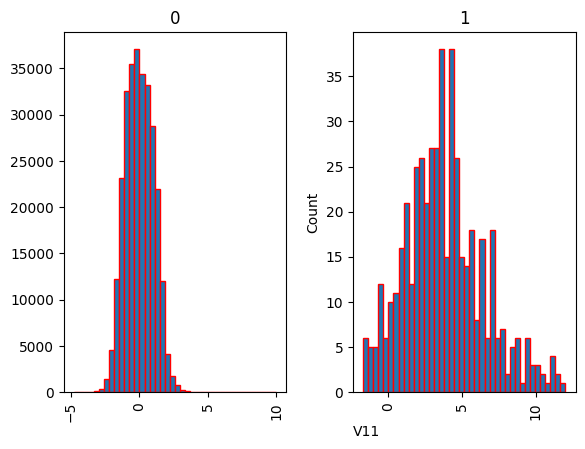

In [51]:
df.hist("V11",by="Class",bins=40,edgecolor="red")

plt.xlabel("V11",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V11 takes the value around 0 ,but for class1 V1 takes many positive values.

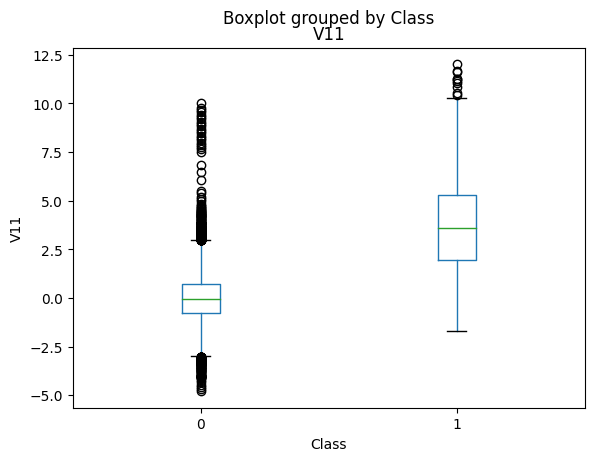

In [52]:
df.boxplot(column="V11",by="Class")
plt.ylabel("V11")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of classes.Most of the outliers in class 1 are positive.

In [53]:
t1=df_0["V11"]>0
t2=df_1["V11"]>0
print("Fraction of Class0 individuals whose V11 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V11 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V11 values are positive :  0.48789195082918596
Fraction of Class1 individuals whose V11 values are positive :  0.9349593495934959


Note that most of the class 1 values(V11) are positive whereas class 0 values are almost equally distributed.

## Column "V12"

In [54]:
pd.DataFrame(u["V12"].mean())

,V12
Class,
0,0.010832
1,-6.259393


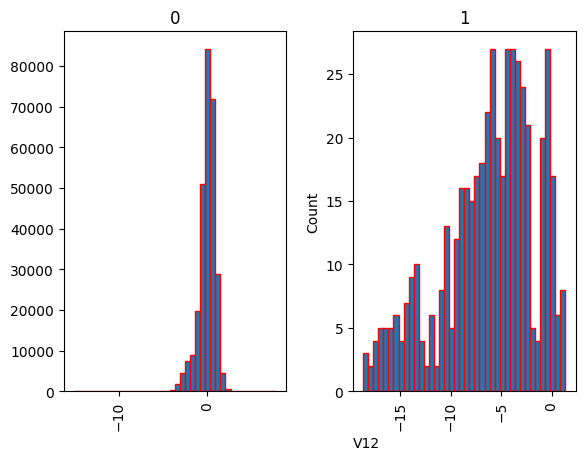

In [55]:
df.hist("V12",by="Class",bins=40,edgecolor="red")

plt.xlabel("V12",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V12 takes the value around 0 ,but for class1 V12 takes many negative values.

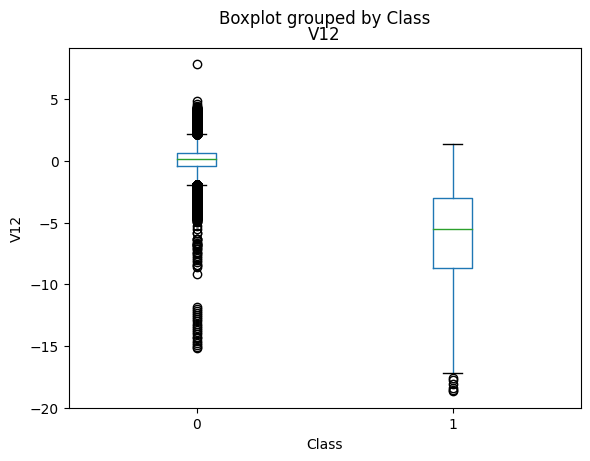

In [56]:
df.boxplot(column="V12",by="Class")
plt.ylabel("V12")
plt.grid(False)
plt.show()

From the the above boxplot we can see that there are lots of outliers for both type of classes.Most of the outliers of class 1 are negative.

In [57]:
t1=df_0["V12"]<0
t2=df_1["V12"]<0
print("Fraction of Class0 individuals whose V12 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V12 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V12 values are negative :  0.42425478782336495
Fraction of Class1 individuals whose V12 values are negative :  0.9491869918699187


Note that most of the values of class 1 are negative whereas the values for class 0 are almost equally distributed.

## Column "V13"

In [58]:
pd.DataFrame(u["V13"].mean())

,V13
Class,
0,0.000189
1,-0.109334


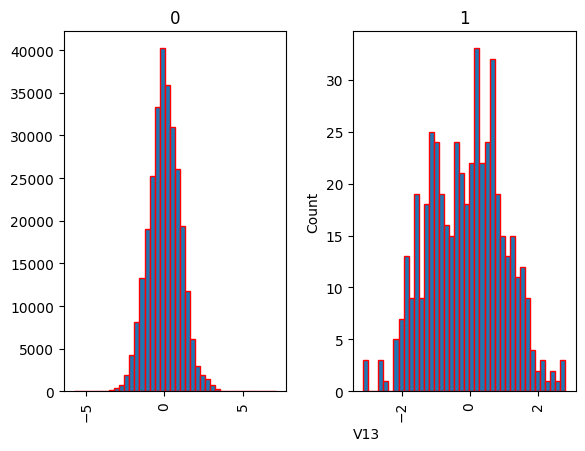

In [59]:
df.hist("V13",by="Class",bins=40,edgecolor="red")

plt.xlabel("V13",loc="left")
plt.ylabel("Count")

plt.show()

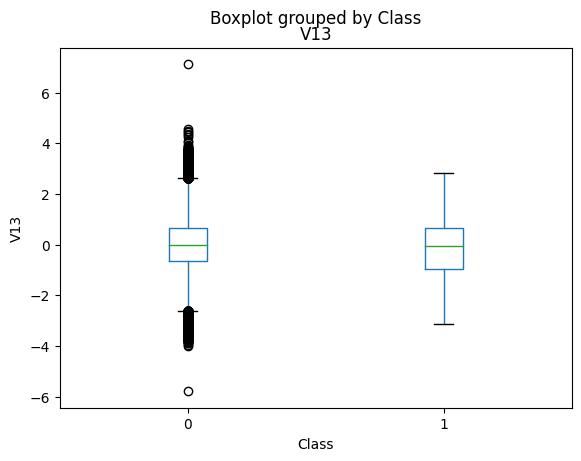

In [60]:
df.boxplot(column="V13",by="Class")
plt.ylabel("V13")
plt.grid(False)
plt.show()

Note that there are outliers for class=0 but for class=1 there are no outliers.

In [61]:
t1=df_0["V13"]<0
t2=df_1["V13"]<0
print("Fraction of Class0 individuals whose V13 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V13 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V13 values are negative :  0.5060373177637479
Fraction of Class1 individuals whose V13 values are negative :  0.5060975609756098


We can conclude that "the value(V13) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V14"

In [62]:
pd.DataFrame(u["V14"].mean())

,V14
Class,
0,0.012064
1,-6.971723


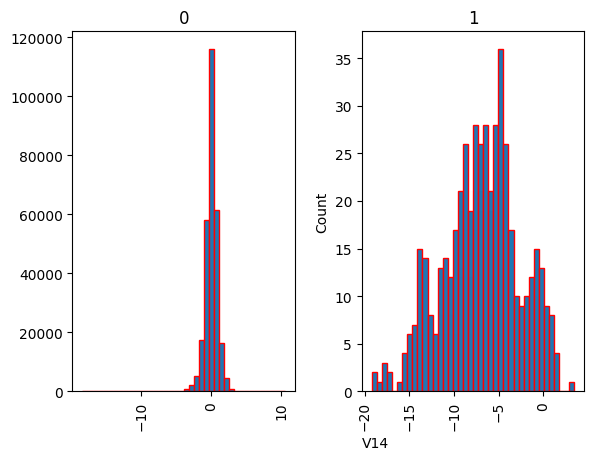

In [63]:
df.hist("V14",by="Class",bins=40,edgecolor="red")

plt.xlabel("V14",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V14 takes the value around 0 ,but for class1 V12 takes many negative values.

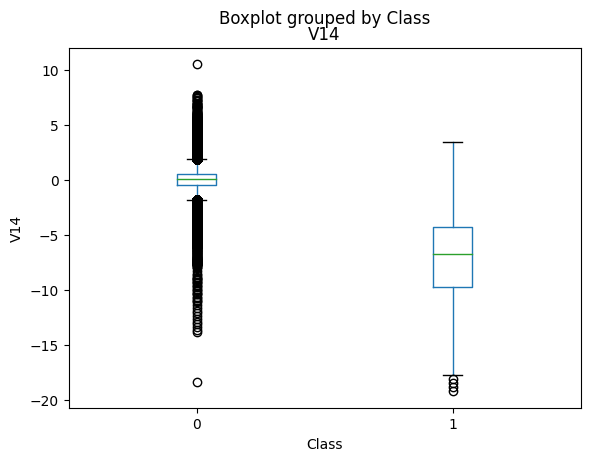

In [64]:
df.boxplot(column="V14",by="Class")
plt.ylabel("V14")
plt.grid(False)
plt.show()

Note that there are lots of outliers for class 0. But for class 1 there are few outliers which are negative.

In [65]:
t1=df_0["V14"]<0
t2=df_1["V14"]<0
print("Fraction of Class0 individuals whose V14 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V14 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V14 values are negative :  0.46882507078416547
Fraction of Class1 individuals whose V14 values are negative :  0.9512195121951219


Note that most of the values of class 1 are negative whereas the values for class 0 are almost equally distributed.

## Column "V15"

In [66]:
pd.DataFrame(u["V15"].mean())

,V15
Class,
0,0.000161
1,-0.092929


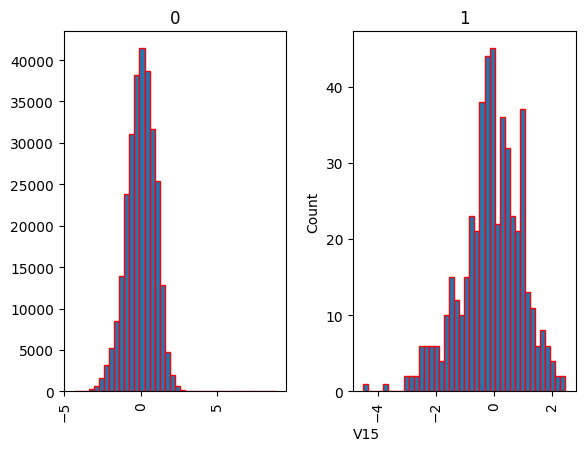

In [67]:
df.hist("V15",by="Class",bins=40,edgecolor="red")

plt.xlabel("V15",loc="left")
plt.ylabel("Count")

plt.show()

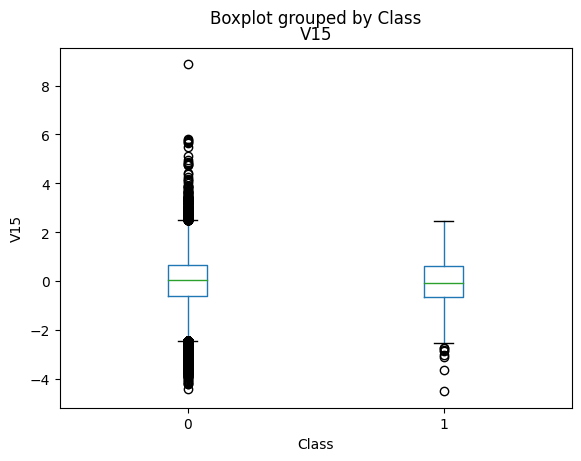

In [68]:
df.boxplot(column="V15",by="Class")
plt.ylabel("V15")
plt.grid(False)
plt.show()

Note that there are lots of outliers for class 0. But for class 1 there are few outliers which are negative.

In [69]:
t1=df_0["V15"]<0
t2=df_1["V15"]<0
print("Fraction of Class0 individuals whose V15 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V15 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V15 values are negative :  0.4782406837486591
Fraction of Class1 individuals whose V15 values are negative :  0.5345528455284553


We can conclude that "the value(V15) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V16"

In [70]:
pd.DataFrame(u["V16"].mean())

,V16
Class,
0,0.007164
1,-4.139946


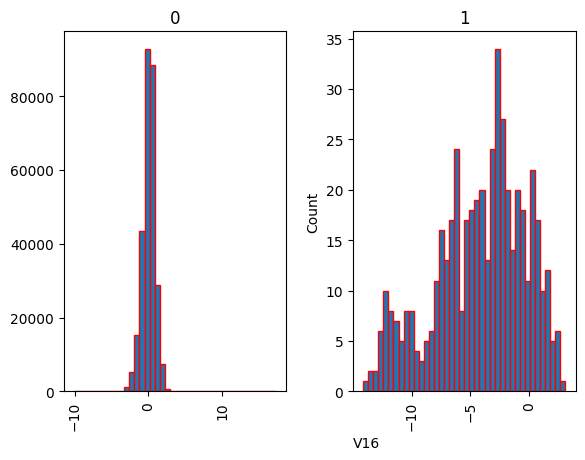

In [71]:
df.hist("V16",by="Class",bins=40,edgecolor="red")

plt.xlabel("V16",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V16 takes the value around 0 ,but for class1 V16 takes many negative values.

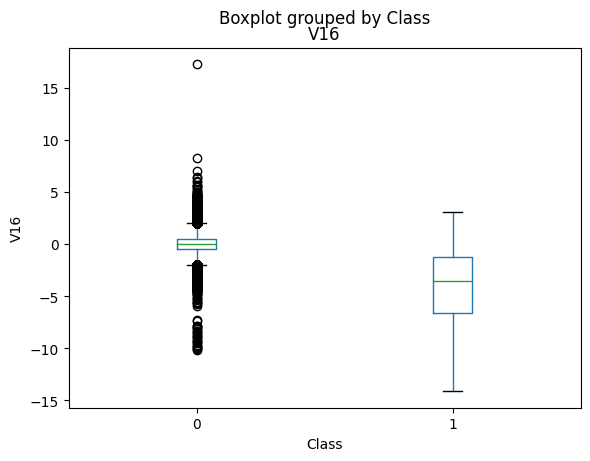

In [72]:
df.boxplot(column="V16",by="Class")
plt.ylabel("V16")
plt.grid(False)
plt.show()

Note that there are outliers for class=0 but for class=1 there are no outliers.

In [73]:
t1=df_0["V16"]<0
t2=df_1["V16"]<0
print("Fraction of Class0 individuals whose V16 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V16 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V16 values are negative :  0.46476619242741324
Fraction of Class1 individuals whose V16 values are negative :  0.8373983739837398


Note that most of the values of class 1 are negative whereas the values for class 0 are almost equally distributed.

## Column "V17"

In [74]:
pd.DataFrame(u["V17"].mean())

,V17
Class,
0,0.011535
1,-6.665836


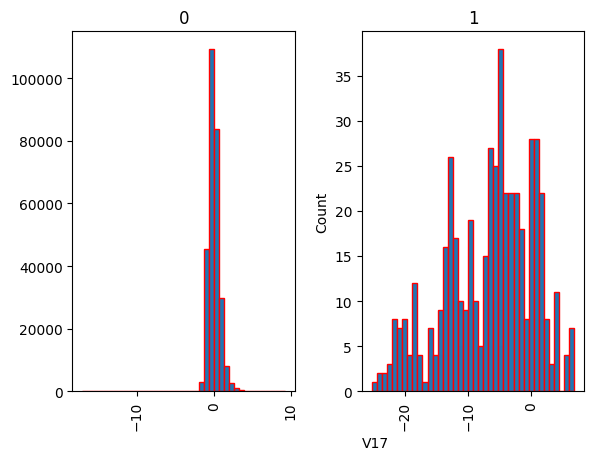

In [75]:
df.hist("V17",by="Class",bins=40,edgecolor="red")

plt.xlabel("V17",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V17 takes the value around 0 ,but for class1 V17 takes many negative values.

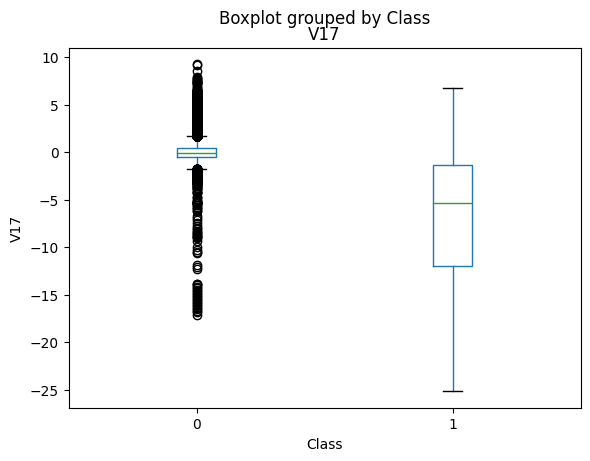

In [76]:
df.boxplot(column="V17",by="Class")
plt.ylabel("V17")
plt.grid(False)
plt.show()

Note that there are outliers for class=0 but for class=1 there are no outliers.

In [77]:
t1=df_0["V17"]<0
t2=df_1["V17"]<0
print("Fraction of Class0 individuals whose V17 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V17 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V17 values are negative :  0.5389796528498321
Fraction of Class1 individuals whose V17 values are negative :  0.8028455284552846


Note that most of the values of class 1 are negative whereas the values for class 0 are almost equally distributed.

## Column "V18"

In [78]:
pd.DataFrame(u["V18"].mean())

,V18
Class,
0,0.003887
1,-2.246308


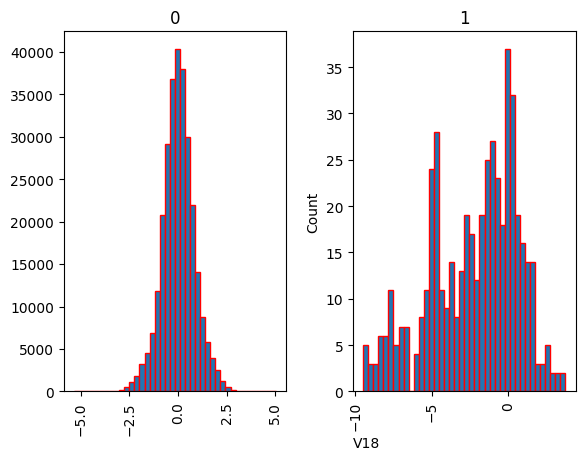

In [79]:
df.hist("V18",by="Class",bins=40,edgecolor="red")

plt.xlabel("V18",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V18 takes the value around 0 ,but for class1 V18 takes many negative values.

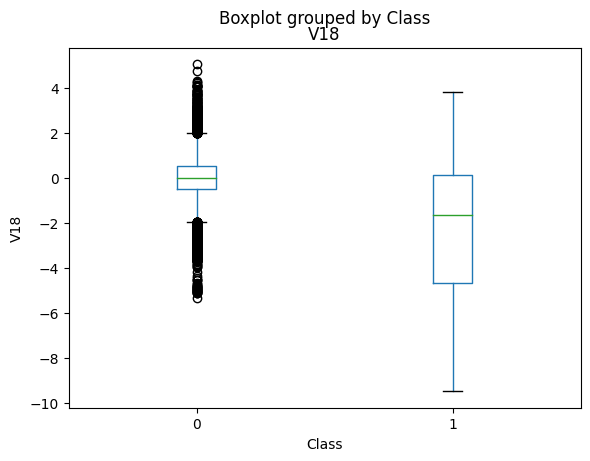

In [80]:
df.boxplot(column="V18",by="Class")
plt.ylabel("V18")
plt.grid(False)
plt.show()

Note that there are outliers for class=0 but for class=1 there are no outliers.

In [81]:
t1=df_0["V18"]<0
t2=df_1["V18"]<0
print("Fraction of Class0 individuals whose V18 values are negative : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V18 values are negative : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V18 values are negative :  0.5014825105956422
Fraction of Class1 individuals whose V18 values are negative :  0.7378048780487805


Note that most of the values of class 1 are negative whereas the values for class 0 are almost equally distributed.

## Column "V19"

In [82]:
pd.DataFrame(u["V19"].mean())

,V19
Class,
0,-0.001178
1,0.680659


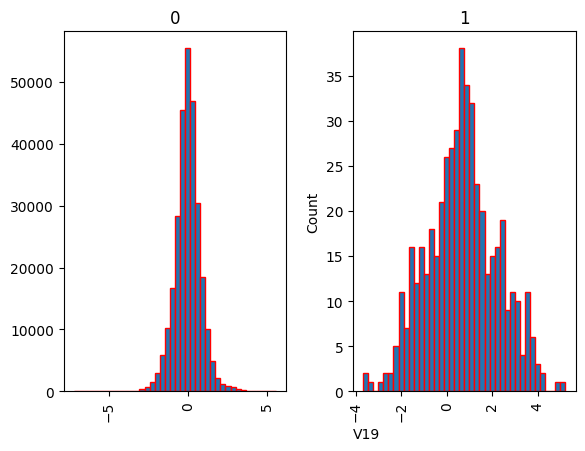

In [83]:
df.hist("V19",by="Class",bins=40,edgecolor="red")

plt.xlabel("V19",loc="left")
plt.ylabel("Count")

plt.show()

From the above table and histogram it can be concluded that for class0 V18 takes the value around 0 ,but for class1 V18 takes many positive values.

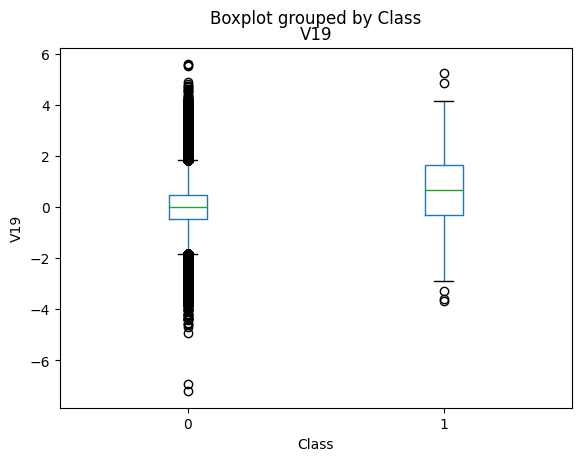

In [84]:
df.boxplot(column="V19",by="Class")
plt.ylabel("V19")
plt.grid(False)
plt.show()

For class 0 there are many outliers but for class 1 there are few outliers.

In [85]:
t1=df_0["V19"]>0
t2=df_1["V19"]>0
print("Fraction of Class0 individuals whose V19 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V19 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V19 values are positive :  0.5017744403214744
Fraction of Class1 individuals whose V19 values are positive :  0.693089430894309


Note that most of the values of class 1 are positive whereas the values for class 0 are almost equally distributed.

## Column "V20"

In [86]:
pd.DataFrame(u["V20"].mean())

,V20
Class,
0,-0.000644
1,0.372319


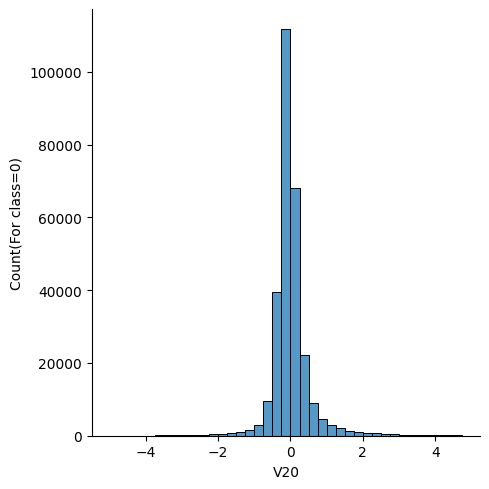

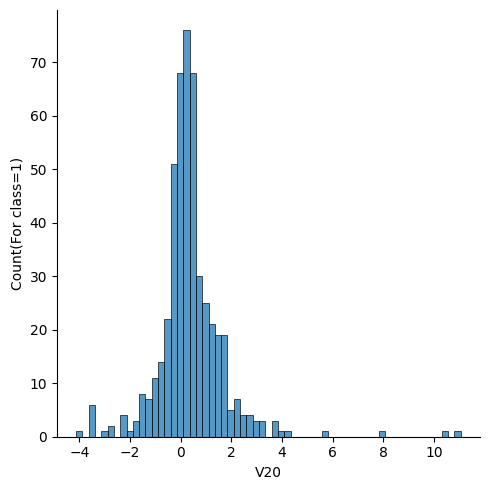

In [87]:
sns.displot(df_c0["V20"],bins=np.arange(-5,5,0.25))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V20"])
plt.ylabel("Count(For class=1)")
plt.show()

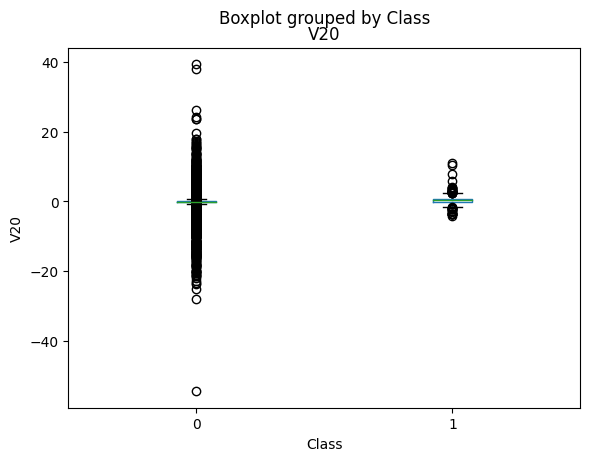

In [88]:
df.boxplot(column="V20",by="Class")
plt.ylabel("V20")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [89]:
t1=df_0["V20"]>0
t2=df_1["V20"]>0
print("Fraction of Class0 individuals whose V20 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V20 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V20 values are positive :  0.4057541811019468
Fraction of Class1 individuals whose V20 values are positive :  0.6402439024390244


## Column "V21"

In [90]:
pd.DataFrame(u["V21"].mean())

,V21
Class,
0,-0.001235
1,0.713588


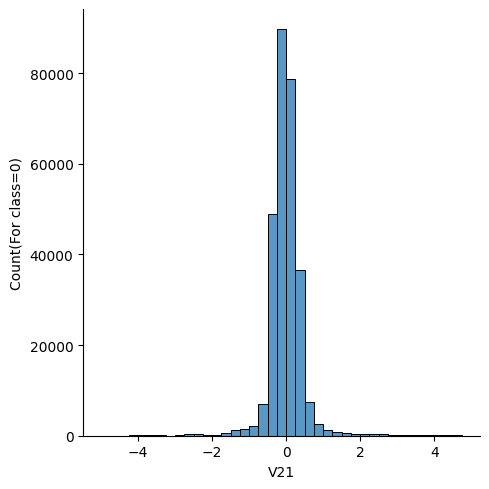

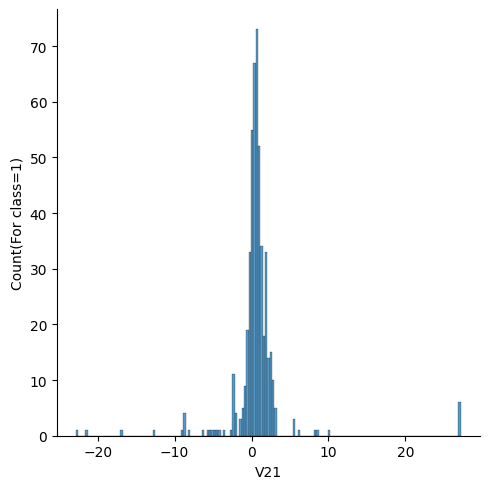

In [91]:
sns.displot(df_c0["V21"],bins=np.arange(-5,5,0.25))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V21"])
plt.ylabel("Count(For class=1)")
plt.show()

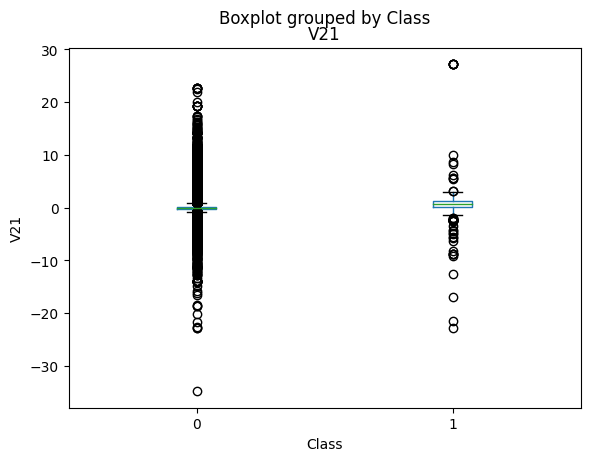

In [92]:
df.boxplot(column="V21",by="Class")
plt.ylabel("V21")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [93]:
t1=df_0["V21"]>0
t2=df_1["V21"]>0
print("Fraction of Class0 individuals whose V21 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V21 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V21 values are positive :  0.4615866204737703
Fraction of Class1 individuals whose V21 values are positive :  0.7621951219512195


Note that most of the values of class 1 are positive whereas the values for class 0 are almost equally distributed.

## Column "V22"

In [94]:
pd.DataFrame(u["V22"].mean())

,V22
Class,
0,-0.000024
1,0.014049


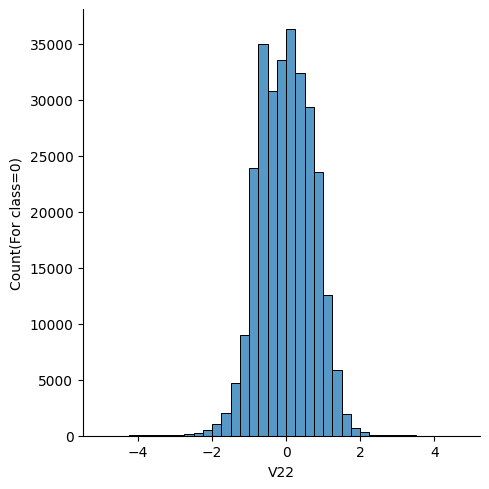

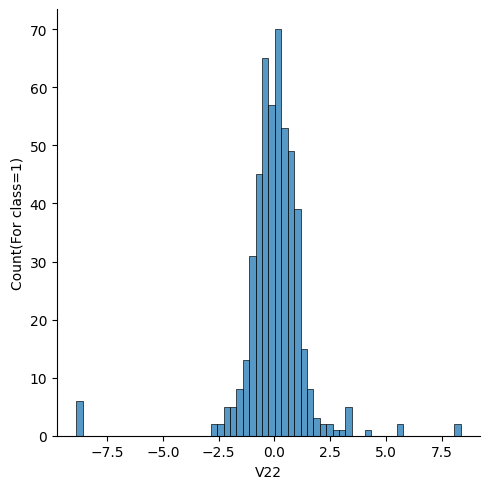

In [95]:
sns.displot(df_c0["V22"],bins=np.arange(-5,5,0.25))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V22"])
plt.ylabel("Count(For class=1)")
plt.show()

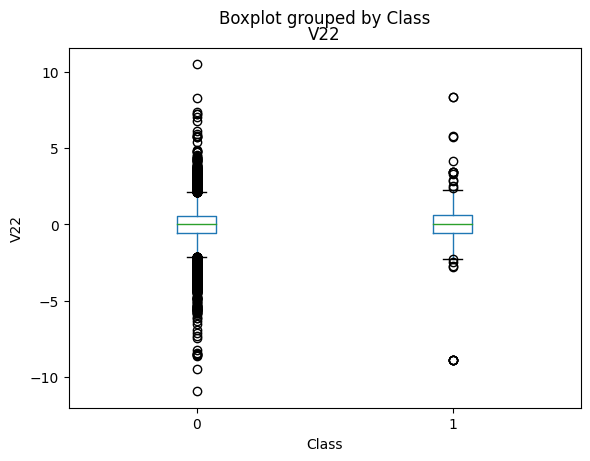

In [96]:
df.boxplot(column="V22",by="Class")
plt.ylabel("V22")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [97]:
t1=df_0["V22"]>0
t2=df_1["V22"]>0
print("Fraction of Class0 individuals whose V22 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V22 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V22 values are positive :  0.5034943636459561
Fraction of Class1 individuals whose V22 values are positive :  0.516260162601626


We can conclude that "the value(V23) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V23"

In [98]:
pd.DataFrame(u["V23"].mean())

,V23
Class,
0,0.000070
1,-0.040308


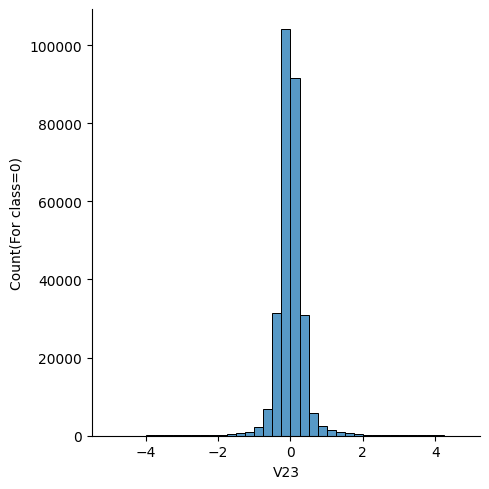

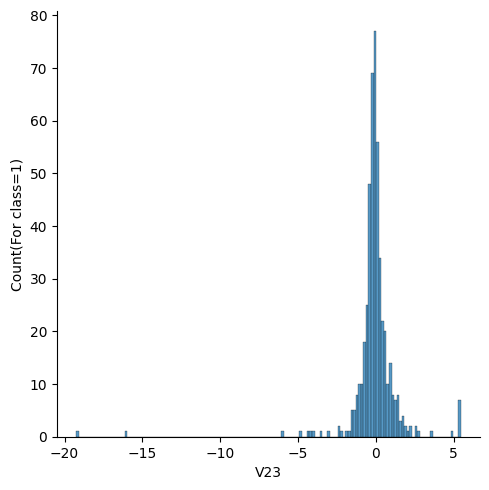

In [99]:
sns.displot(df_c0["V23"],bins=np.arange(-5,5,0.25))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V23"])
plt.ylabel("Count(For class=1)")
plt.show()

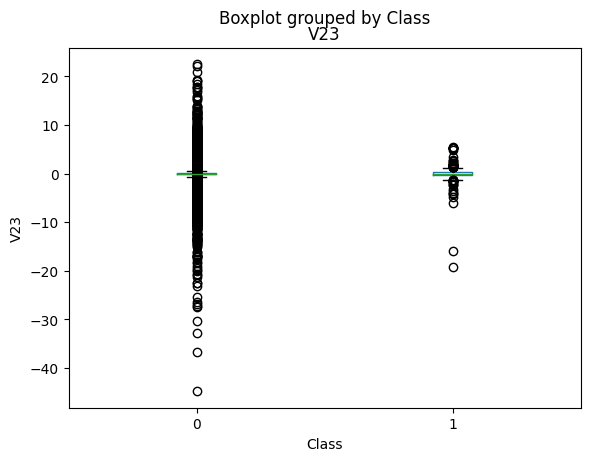

In [100]:
df.boxplot(column="V23",by="Class")
plt.ylabel("V23")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [101]:
t1=df_0["V23"]>0
t2=df_1["V23"]>0
print("Fraction of Class0 individuals whose V23 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V23 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V23 values are positive :  0.4790320595114574
Fraction of Class1 individuals whose V23 values are positive :  0.42886178861788615


We can conclude that "the value(V23) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V24"

In [102]:
pd.DataFrame(u["V24"].mean())

,V24
Class,
0,0.000182
1,-0.105130


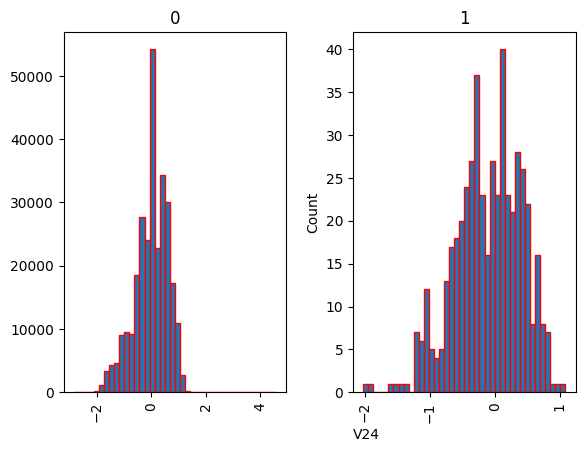

In [103]:
df.hist("V24",by="Class",bins=40,edgecolor="red")

plt.xlabel("V24",loc="left")
plt.ylabel("Count")

plt.show()

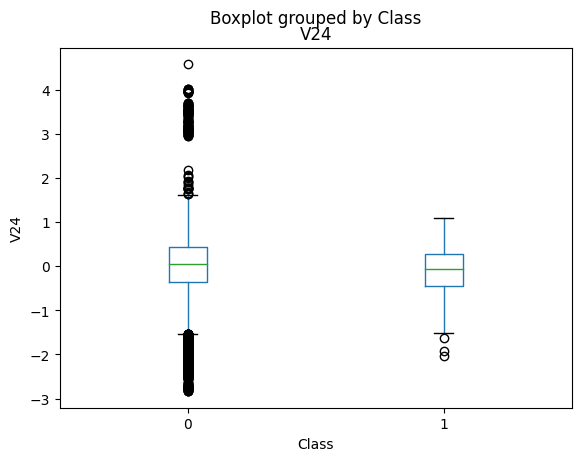

In [104]:
df.boxplot(column="V24",by="Class")
plt.ylabel("V24")
plt.grid(False)
plt.show()

There are lots of outliers for class 0 but there are small numbers of outliers for class 1 which are negative.

In [105]:
t1=df_0["V24"]>0
t2=df_1["V24"]>0
print("Fraction of Class0 individuals whose V24 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V24 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V24 values are positive :  0.5516768373107293
Fraction of Class1 individuals whose V24 values are positive :  0.4573170731707317


We can conclude that "the value(V24) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V25"

In [106]:
pd.DataFrame(u["V25"].mean())

,V25
Class,
0,-0.000072
1,0.041449


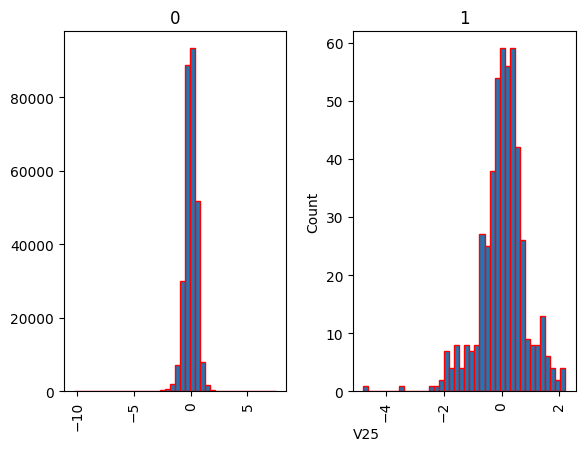

In [107]:
df.hist("V25",by="Class",bins=40,edgecolor="red")

plt.xlabel("V25",loc="left")
plt.ylabel("Count")

plt.show()

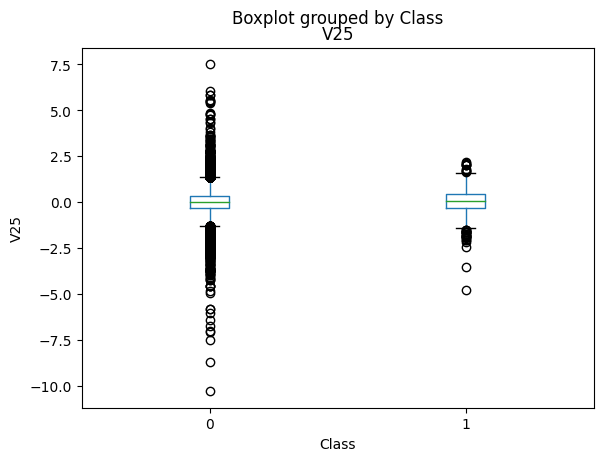

In [108]:
df.boxplot(column="V25",by="Class")
plt.ylabel("V25")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [109]:
t1=df_0["V25"]>0
t2=df_1["V25"]>0
print("Fraction of Class0 individuals whose V25 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V25 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V25 values are positive :  0.5107961240173751
Fraction of Class1 individuals whose V25 values are positive :  0.5650406504065041


We can conclude that "the value(V25) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V26"

In [110]:
pd.DataFrame(u["V26"].mean())

,V26
Class,
0,-0.000089
1,0.051648


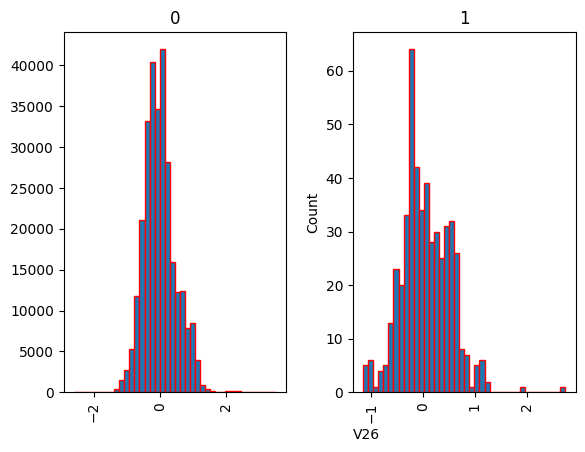

In [111]:
df.hist("V26",by="Class",bins=40,edgecolor="red")

plt.xlabel("V26",loc="left")
plt.ylabel("Count")

plt.show()

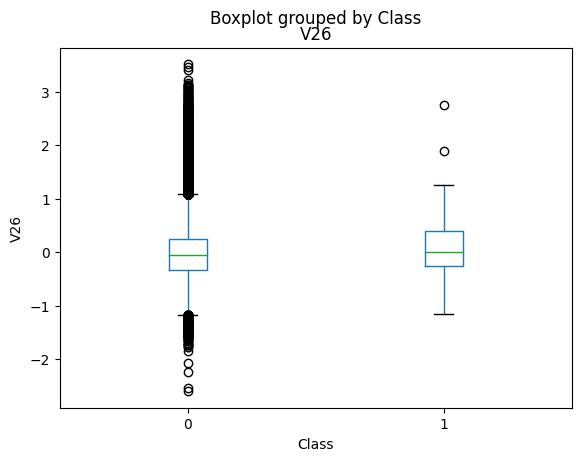

In [112]:
df.boxplot(column="V26",by="Class")
plt.ylabel("V26")
plt.grid(False)
plt.show()

There are lots of outliers for class 0 but there are small numbers of outliers for class 1 which are positive.

In [113]:
t1=df_0["V26"]>0
t2=df_1["V26"]>0
print("Fraction of Class0 individuals whose V26 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V26 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V26 values are positive :  0.46722473313050666
Fraction of Class1 individuals whose V26 values are positive :  0.5040650406504065


We can conclude that "the value(V26) of an individual is positive or negative" does not depend on which class it belongs to.

## Column "V27"

In [114]:
pd.DataFrame(u["V27"].mean())

,V27
Class,
0,-0.000295
1,0.170575


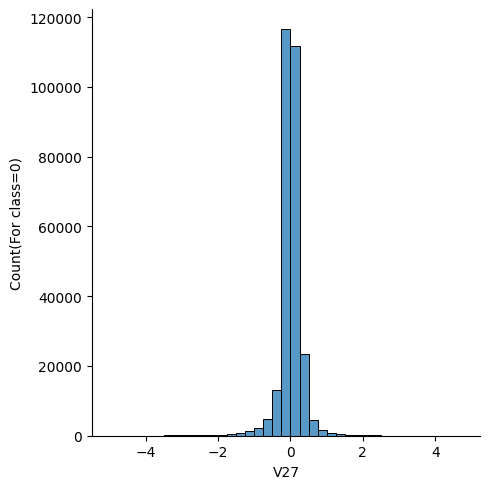

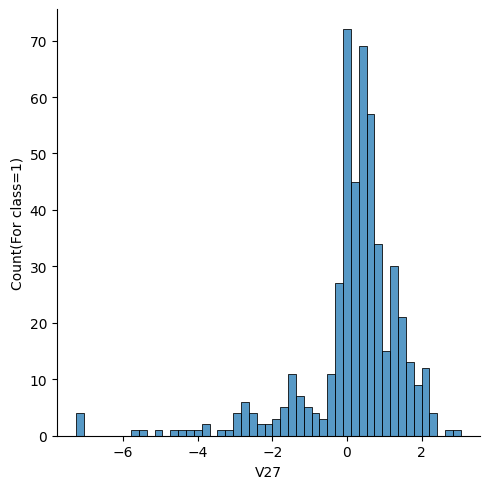

In [115]:
sns.displot(df_c0["V27"],bins=np.arange(-5,5,0.25))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V27"])
plt.ylabel("Count(For class=1)")
plt.show()

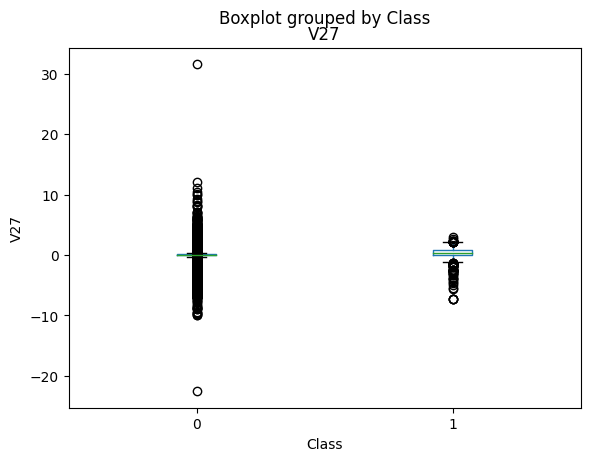

In [116]:
df.boxplot(column="V27",by="Class")
plt.ylabel("V27")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [117]:
t1=df_0["V27"]>0
t2=df_1["V27"]>0
print("Fraction of Class0 individuals whose V27 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V27 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V27 values are positive :  0.5045284279760125
Fraction of Class1 individuals whose V27 values are positive :  0.7276422764227642


Note that most of the values of class 1 are positive whereas the values for class 0 are almost equally distributed.

## Column "V28"

In [118]:
pd.DataFrame(u["V28"].mean())

,V28
Class,
0,-0.000131
1,0.075667


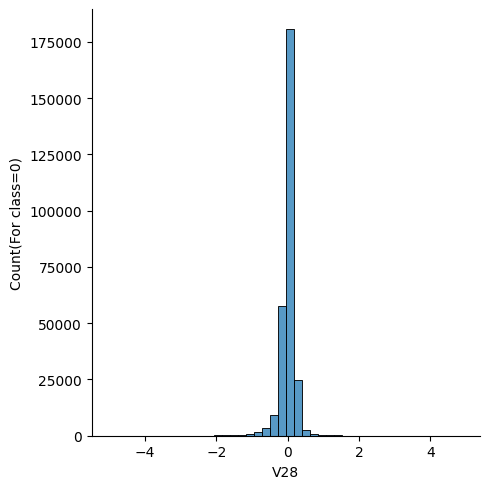

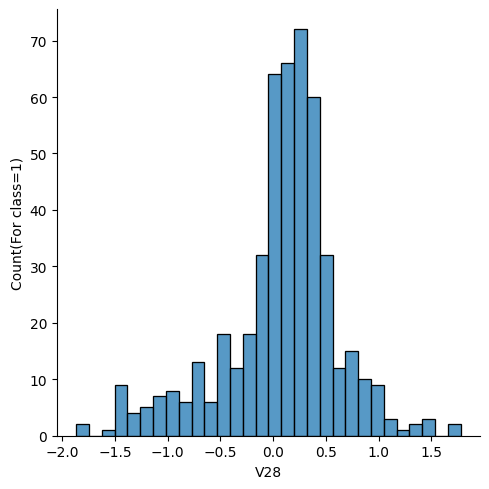

In [119]:
sns.displot(df_c0["V28"],bins=np.arange(-5,5,0.225))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["V28"])
plt.ylabel("Count(For class=1)")
plt.show()

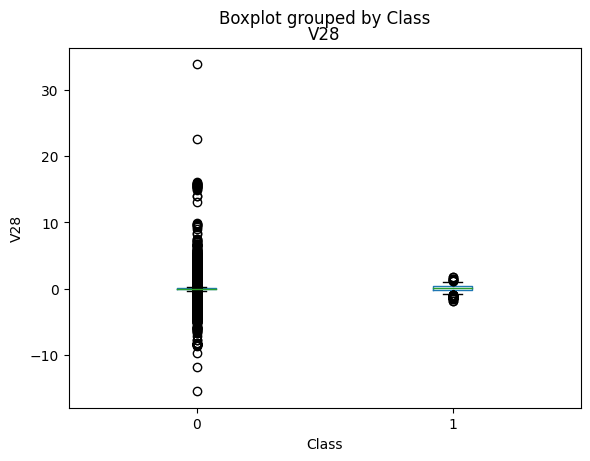

In [120]:
df.boxplot(column="V28",by="Class")
plt.ylabel("V28")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

In [121]:
t1=df_0["V28"]>0
t2=df_1["V28"]>0
print("Fraction of Class0 individuals whose V28 values are positive : ",t1.sum()/t1.count())
print("Fraction of Class1 individuals whose V28 values are positive : ",t2.sum()/t2.count())

Fraction of Class0 individuals whose V28 values are positive :  0.5577721892970825
Fraction of Class1 individuals whose V28 values are positive :  0.6829268292682927


Note that most of the values of class 1 are positive whereas the values for class 0 are almost equally distributed.

## Column "Amount"

In [122]:
pd.DataFrame(u["Amount"].mean())

,Amount
Class,
0,88.291022
1,122.211321


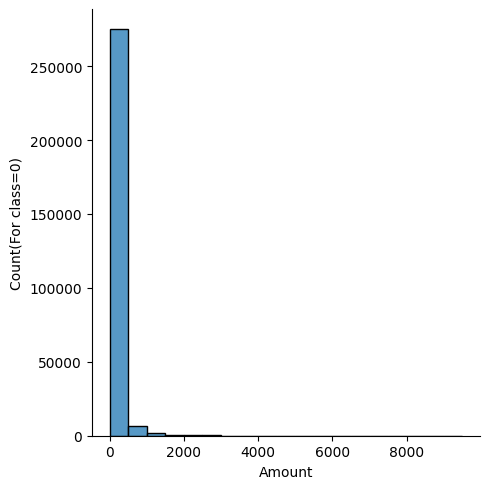

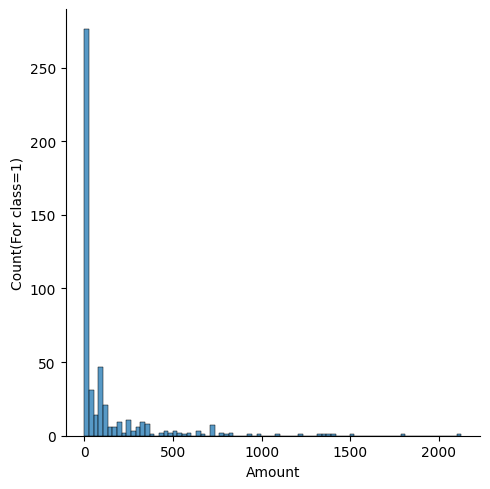

In [123]:
sns.displot(df_c0["Amount"],bins=np.arange(0,10000,500))
plt.ylabel("Count(For class=0)")
sns.displot(df_c1["Amount"])
plt.ylabel("Count(For class=1)")
plt.show()

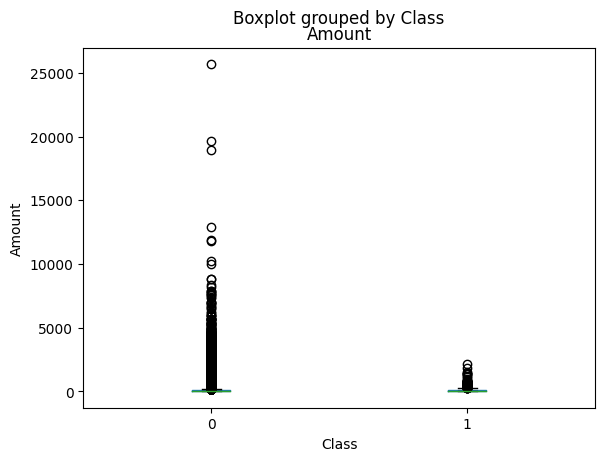

In [124]:
df.boxplot(column="Amount",by="Class")
plt.ylabel("Amount")
plt.grid(False)
plt.show()

Note that there are lots of outliers for both classes.

## Column "Class"

In [125]:
pd.DataFrame(df["Class"].value_counts())

,Class
0,284315
1,492


Note that number of individuals having class=1 is very small than class=0 ,which can also been seen from the following barplot.

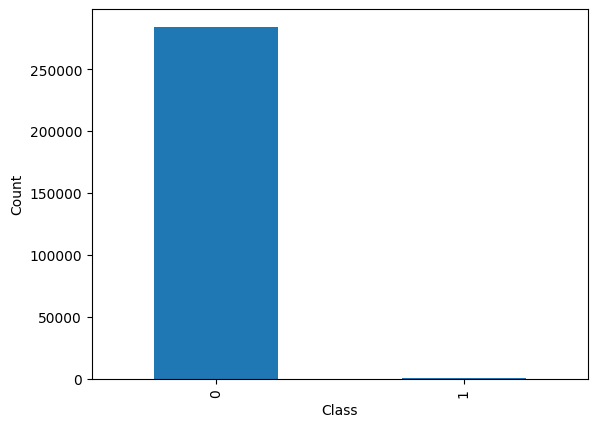

In [126]:
df["Class"].value_counts().plot.bar()
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

## Data Normalizartion

In [127]:
scalar=StandardScaler()
df_1=pd.DataFrame(scalar.fit_transform(df),columns=df.columns)
df_1=df_1.drop("Class",axis=1)
data=pd.concat([df_1,df["Class"]],axis=1)

In [128]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0


## Data Balancing

Here we use SMOTE method for data balancing

In [129]:
X=data.drop(["Class"],axis=1)
Y=data.Class
smote=SMOTE(sampling_strategy='not majority',k_neighbors=5)
X_smoot,Y_smoot=smote.fit_resample(X,Y)

In [130]:
Y_smoot.value_counts()

0    284315
1    284315
Name: Class, dtype: int64

## Applying different supervised machine learning alogoritm on the dataset

### About Efficiency of a model

To judge the efficiency of a model we check mainly three things:
* precision: True positive/(True positive + False positive)
* recall:True positive/(True positive + False negative)
* F1 score: Harmonic mean of precision and recall
There is an another thing called model score which is the proportion of correct predictions.

### Dimension Reduction of the dataset using Principal Component Analysis:

In [131]:
from sklearn.decomposition import PCA
pca=PCA(0.95)
X_pca=pca.fit_transform(X_smoot)

### 1. Logistic Regression

* Import Logistic Regression

In [132]:
from sklearn.linear_model import LogisticRegression
model1=LogisticRegression()

#### A. Without dimension reduction

* Train-Test Spliting

In [133]:
X_train,X_test,Y_train,Y_test=train_test_split(X_smoot,Y_smoot,test_size=0.3,shuffle=True,random_state=10)

* Fitting Model

In [134]:
model1.fit(X_train,Y_train)

LogisticRegression()

* Confusion Matrix

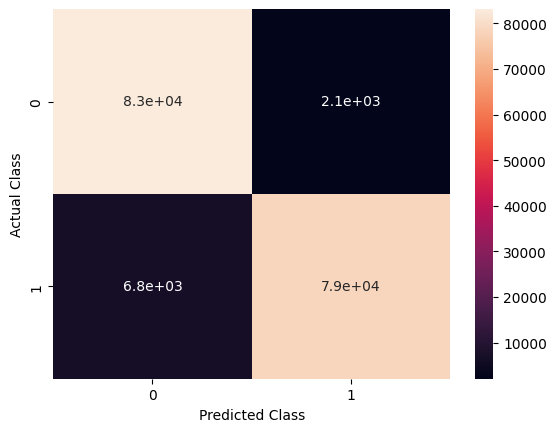

In [135]:
predicted_class=model1.predict(X_test)
cm=confusion_matrix(Y_test,predicted_class)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

* Classification Report

In [136]:
print(metrics.classification_report(Y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     85205
           1       0.97      0.92      0.95     85384

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589



* Conclusion

Here F1 score for both the classes is 0.95.Specially precision,recall both are high for class = 1. Model accuracy is also high(0.95).So the Logistic Regression Model fits the data very well.

#### B. After dimension reduction

* Train-Test Split

In [143]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y_smoot,test_size=0.3,shuffle=True,random_state=10)

* Fitting Model

In [144]:
model1.fit(X_train,Y_train)

LogisticRegression()

* Confusion Matrix

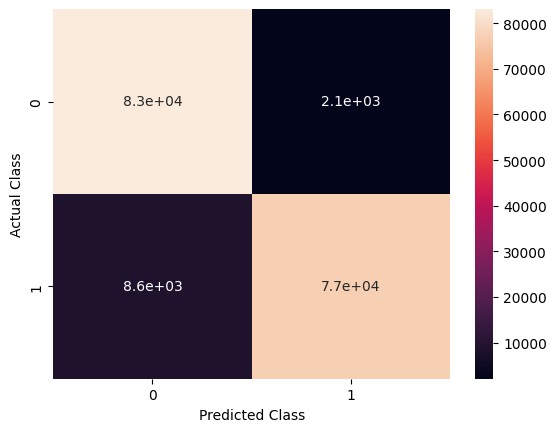

In [145]:
predicted_class=model1.predict(X_test)
cm=confusion_matrix(Y_test,predicted_class)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

* Classification Report

In [146]:
print(metrics.classification_report(Y_test,predicted_class))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85205
           1       0.97      0.90      0.93     85384

    accuracy                           0.94    170589
   macro avg       0.94      0.94      0.94    170589
weighted avg       0.94      0.94      0.94    170589



* After using PCA , now the F1 score is 0.94,which is good with respect to the dimension of the data.

### 2. Random Forest

* Import Random Forest

In [138]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier()

#### A. Without dimension reduction

* Train-Test Spliting

In [151]:
X_train,X_test,Y_train,Y_test=train_test_split(X_smoot,Y_smoot,test_size=0.3,shuffle=True,random_state=10)

* Fitting Model

In [152]:
model2.fit(X_train,Y_train)

RandomForestClassifier()

* Confusion Matrix

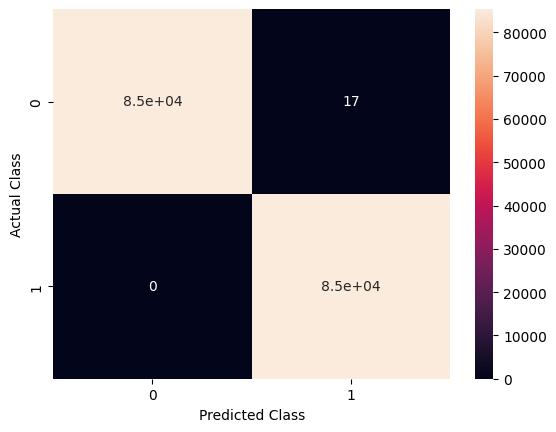

In [153]:
predicted_class=model2.predict(X_test)
cm=confusion_matrix(Y_test,predicted_class)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

* Classification Report

In [154]:
print(metrics.classification_report(Y_test,predicted_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85205
           1       1.00      1.00      1.00     85384

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



* Conclusion

Here F1 score for class=1 is 0.88 which is not good as Logistic Regression Model.But the accuracy of the model is 1.

#### B. After dimension reduction

* Train-Test Split

In [147]:
X_train,X_test,Y_train,Y_test=train_test_split(X_pca,Y_smoot,test_size=0.3,shuffle=True,random_state=10)

* Fitting Model

In [148]:
model2.fit(X_train,Y_train)

RandomForestClassifier()

* Confusion Matrix

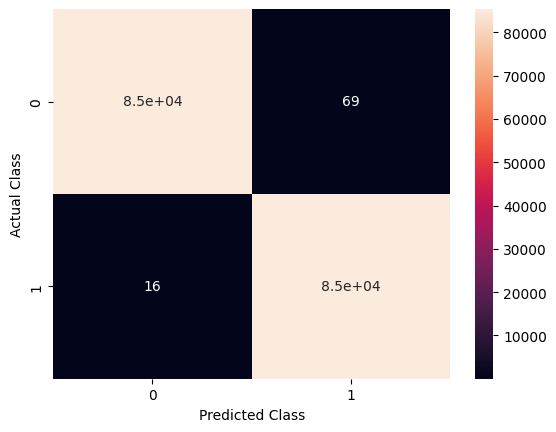

In [149]:
predicted_class=model2.predict(X_test)
cm=confusion_matrix(Y_test,predicted_class)
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.show()

* Classification Report

In [150]:
print(metrics.classification_report(Y_test,predicted_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85205
           1       1.00      1.00      1.00     85384

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589



* After using PCA , now the F1 score is 1,which is extraordinary with respect to the dimension of the data.